In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

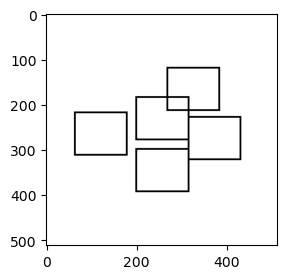

In [15]:
img=cv2.imread(r"C:\Users\10469\doc\2023\T5\230105-plan_program\test\9.png",0)
_,thresh = cv2.threshold(img,1,255,cv2.THRESH_BINARY)
thresh.shape

plt.figure(figsize=(3,3))
plt.imshow(thresh,cmap='gray',vmin=0, vmax=255)

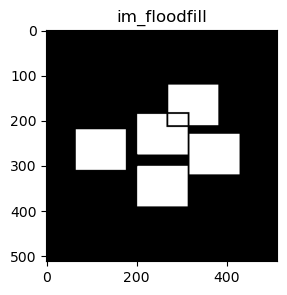

In [16]:
h,w = thresh.shape[:2]
mask = np.zeros((h+2,w+2),np.uint8)

im_floodfill = thresh.copy()
cv2.floodFill(im_floodfill, mask, (0,0),0)
# im_fill_inv= cv2.bitwise_not(im_floodfill)

plt.figure(figsize=(3,3))
plt.title('im_floodfill')
plt.imshow(im_floodfill,cmap='gray',vmin=0, vmax=255)

# cv2.imwrite (r"C:\Users\10469\doc\2023\T5\230105-plan_program\test\2-111.jpg",gray)


6


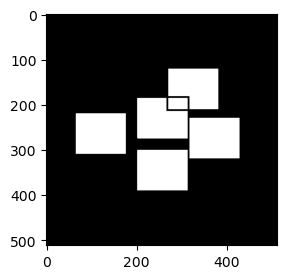

In [17]:
# gray= cv2.inRange(im_floodfill,100,100)
_,thresh = cv2.threshold(im_floodfill,0,255,cv2.THRESH_BINARY)
plt.figure(figsize=(3,3))
plt.imshow(thresh,cmap='gray',vmin=0, vmax=255)

contours,hierarchy= cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

sorted_contours = sorted(contours,key=cv2.contourArea,reverse=True)
print(len(sorted_contours))

In [18]:
def scale_contour(cnt, scale):
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    cnt_scaled = cnt_norm * scale
    cnt_scaled = cnt_scaled + [cx, cy]
    cnt_scaled = cnt_scaled.astype(np.int32)

    return cnt_scaled

In [19]:

# print(img.shape)
# cv2.rectangle(img,(0,0),(img.shape[1],img.shape[0]),0,-1)
# plt.imshow(img,cmap='gray',vmin=0, vmax=255)

roomCon = []
scaCon = []
indx=0
center=[]

printImg = im_floodfill
printImg = cv2.rectangle(img,(0,0),(img.shape[1],img.shape[0]),100,-1)

for c in sorted_contours:
    area = cv2.contourArea(c)
#     print(area)
#find the center of each contour 
    x,y,w,h = cv2.boundingRect(c)   #min_x , min_y ,w , h
    print(x,y,w,h)
    cx=int(x+w/2)
    cy=int(y+h/2)
    print("center:",cx,cy)
    center.append((cx,cy))
    cv2.circle(printImg,(cx,cy),7,(0,255,0),-1)    
    cv2.putText(printImg,str(indx),(cx-10,cy-10),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    
    roomCon.append(cv2.drawContours(printImg,[c],-1,(0,255,0),3))
    

    indx=indx+1
    
    c=scale_contour(c, 1.1)   
    scaCon.append(c)
#     cv2.drawContours(printImg,[c],-1,(0,255,0),1) #draw the scaled contour

    
#     print(cx)

        
print(indx)
print(center[2])
# print(roomCon[0])

202 301 112 90
center: 258 346
318 230 111 90
center: 373 275
66 220 111 90
center: 121 265
202 186 112 90
center: 258 231
271 121 111 90
center: 326 166
271 186 43 25
center: 292 198
6
(121, 265)


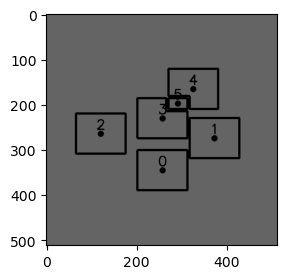

In [20]:
plt.figure(figsize=(3,3))
plt.imshow(printImg,cmap='gray',vmin=0, vmax=255)

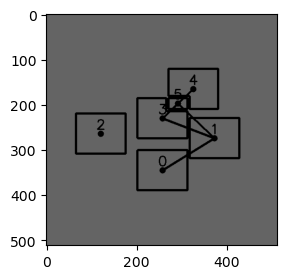

In [21]:
for i in range(0,indx):
    xi,yi,wi,hi = cv2.boundingRect(scaCon[i]) 
#     print (center[i])
    for j in range(0,indx):
#         print (center[j])
        xj,yj,wj,hj = cv2.boundingRect(scaCon[i])
        
        distX =  abs(center[i][0]-center[j][0])
        distY =  abs(center[i][1]-center[j][1])
        
#         print (distX,distY)
        
        if distX < (wi+wj)/2 and distY < (hi+hj)/2:
            cv2.line(printImg, center[i], center[j], 0, 3)
            
plt.figure(figsize=(3,3))
plt.imshow(printImg,cmap='gray',vmin=0, vmax=255)   

In [22]:
cv2.imwrite (r"C:\Users\10469\doc\2023\T5\230105-plan_program\test\9-connectivity.jpg",printImg)


True

(292, 198) (373, 275)
268 184 48 28


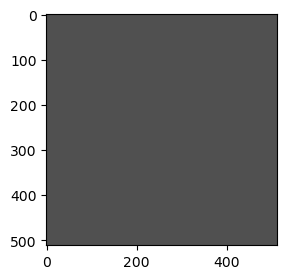

In [13]:
printImgtest=cv2.rectangle(img,(0,0),(img.shape[1],img.shape[0]),80,-1)

i=5
j=1

print (center[i],center[j])
xi,yi,wi,hi = cv2.boundingRect(scaCon[i])
xj,yj,wj,hj = cv2.boundingRect(scaCon[j])
print(xi,yi,wi,hi)

distX =  abs(center[i][0]-center[j][0])
distY =  abs(center[i][1]-center[j][1])
if distX < (wi+wj)/2 and distY < (hi+hj)/2:
    cv2.line(printImg, center[i], center[j], 0, 3)
    
plt.figure(figsize=(3,3))
plt.imshow(printImgtest,cmap='gray',vmin=0, vmax=255)           